<a href="https://colab.research.google.com/github/divyaa1030/divyaa30/blob/main/Divyaaanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Credit Card Fraud Detection – Transaction Level Fraud Analysis**

## 2. Introduction
- Credit card fraud is one of the biggest threats in digital payments.
- The goal of this project is to detect fraudulent transactions using machine learning.
- The dataset is highly imbalanced, with very few fraud cases compared to normal transactions.
- We will analyze transactions and build models to predict fraud at transaction level.

In [ ]:
## 3. Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [ ]:
## 4.Loading Dataset

df=pd.read_csv("/content/creditcard.csv")
print(df)

        Time        V1        V2        V3        V4        V5        V6  \
0          0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1          0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2          1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3          1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4          2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
...      ...       ...       ...       ...       ...       ...       ...   
47623  43281 -0.696585  1.108944  1.413769 -0.127104  0.018555 -0.455078   
47624  43282 -0.282262 -1.212401  2.174897 -0.181501 -1.604027 -0.332694   
47625  43282 -1.513495 -0.206282 -0.702405  1.056423  1.058711 -0.708973   
47626  43282 -0.659193  1.270953  0.946464 -0.370180  1.619207 -0.288297   
47627  43282  1.121749 -0.208202  0.660816  0.857988 -0.823614 -0.422509   

             V7        V8        V9  ...       V21       V22       V23  \
0      0.2395

In [ ]:
# Step 5: Understanding the Dataset

#  Dataset Shape
print("Dataset Shape:", df.shape)  # Rows and columns

#  Column Names
print("\nColumns in Dataset:")
print(df.columns)

#  Preview First 5 Rows
print("\nFirst 5 Rows of Dataset:")
df.head()

#  Check Missing Values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())

#  Check Class Distribution
print("\nClass Distribution (0 = Normal, 1 = Fraud):")
print(df['Class'].value_counts())

#  Percentage of Fraud vs Normal
fraud_count = df['Class'].value_counts()[1]
normal_count = df['Class'].value_counts()[0]
print("\nPercentage of Fraudulent Transactions: {:.4f}%".format((fraud_count / len(df)) * 100))
print("Percentage of Normal Transactions: {:.4f}%".format((normal_count / len(df)) * 100))

#  Summary Statistics
print("\nSummary Statistics for Numeric Columns:")
df.describe()

Dataset Shape: (47628, 31)

Columns in Dataset:
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

First 5 Rows of Dataset:

Missing Values in Each Column:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

Class Distribution (0 = Normal, 1 = Fraud):
Class
0.0    47481
1.0      146
Name: count, dtype: int64

Percentage of Fraudulent Transactions: 0.3065%
Percentage of Normal Transactions: 99.6914%

Summary Statistics for Numeric Columns:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,47628.000000,47628.000000,47628.000000,47628.000000,47628.000000,47628.000000,47628.000000,47628.000000,47628.000000,47628.000000,...,47627.000000,47627.000000,47627.000000,47627.000000,47627.000000,47627.000000,47627.000000,47627.000000,47627.000000,47627.000000
mean,28183.123562,-0.240703,0.021469,0.694689,0.191074,-0.249837,0.102310,-0.119867,0.053450,0.141204,...,-0.027059,-0.107091,-0.039399,0.007890,0.136314,0.022561,0.004907,0.004021,91.777163,0.003065
std,13001.722320,1.884794,1.626518,1.519894,1.402196,1.412854,1.309931,1.282101,1.216930,1.214104,...,0.737251,0.637200,0.579666,0.594175,0.438367,0.502411,0.388191,0.335275,249.818013,0.055283
min,0.000000,-56.407510,-72.715728,-32.965346,-5.172595,-42.147898,-26.160506,-26.548144,-41.484823,-9.283925,...,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.577118,-8.567638,-9.617915,0.000000,0.000000
25%,20517.000000,-0.990001,-0.548684,0.220594,-0.714455,-0.857297,-0.636473,-0.602224,-0.146950,-0.597975,...,-0.231991,-0.528167,-0.179247,-0.322459,-0.128057,-0.329467,-0.063838,-0.006862,7.590000,0.000000
50%,32930.500000,-0.248789,0.085468,0.800243,0.195142,-0.282244,-0.152017,-0.074952,0.057092,0.026153,...,-0.069134,-0.081945,-0.051439,0.061661,0.175871,-0.068195,0.008665,0.021873,24.990000,0.000000
75%,38236.000000,1.156434,0.736933,1.432158,1.070576,0.286638,0.492728,0.425886,0.329612,0.837269,...,0.107256,0.306116,0.078475,0.401231,0.421741,0.302743,0.083933,0.076168,83.110000,0.000000
max,43282.000000,1.960497,18.183626,4.101716,16.491217,34.801666,22.529298,36.677268,20.007208,10.392889,...,22.614889,5.805795,17.297845,4.014444,5.525093,3.517346,11.135740,33.847808,12910.930000,1.000000


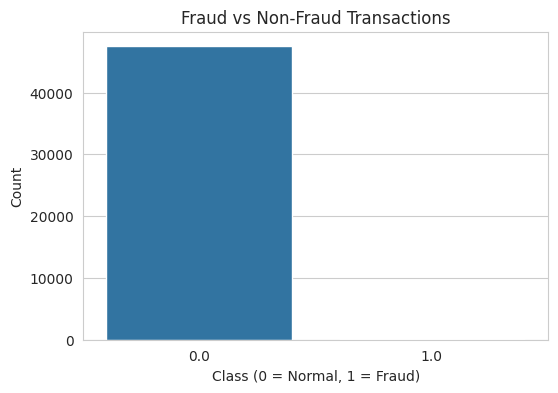

Fraudulent Transactions: 0.3065%
Normal Transactions: 99.6914%


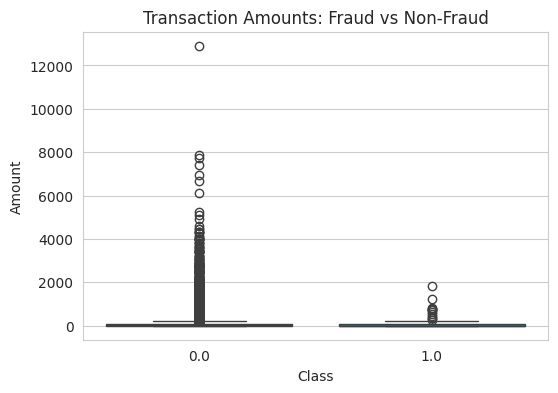

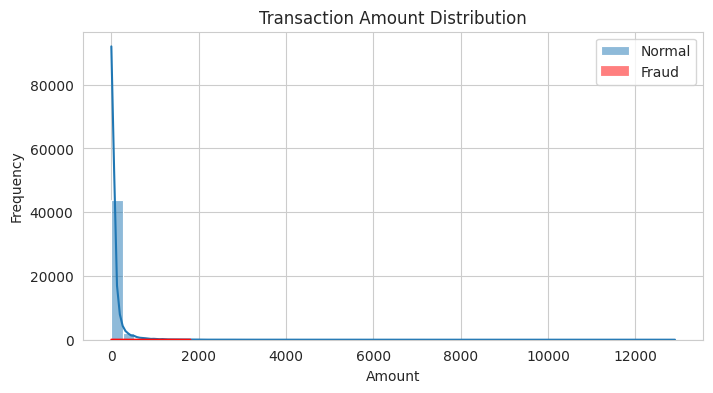

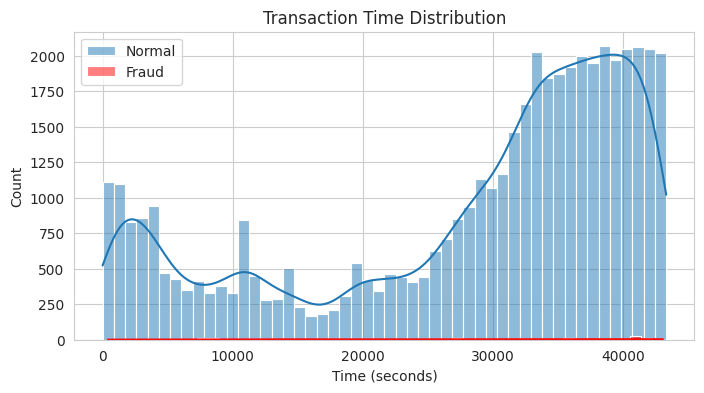

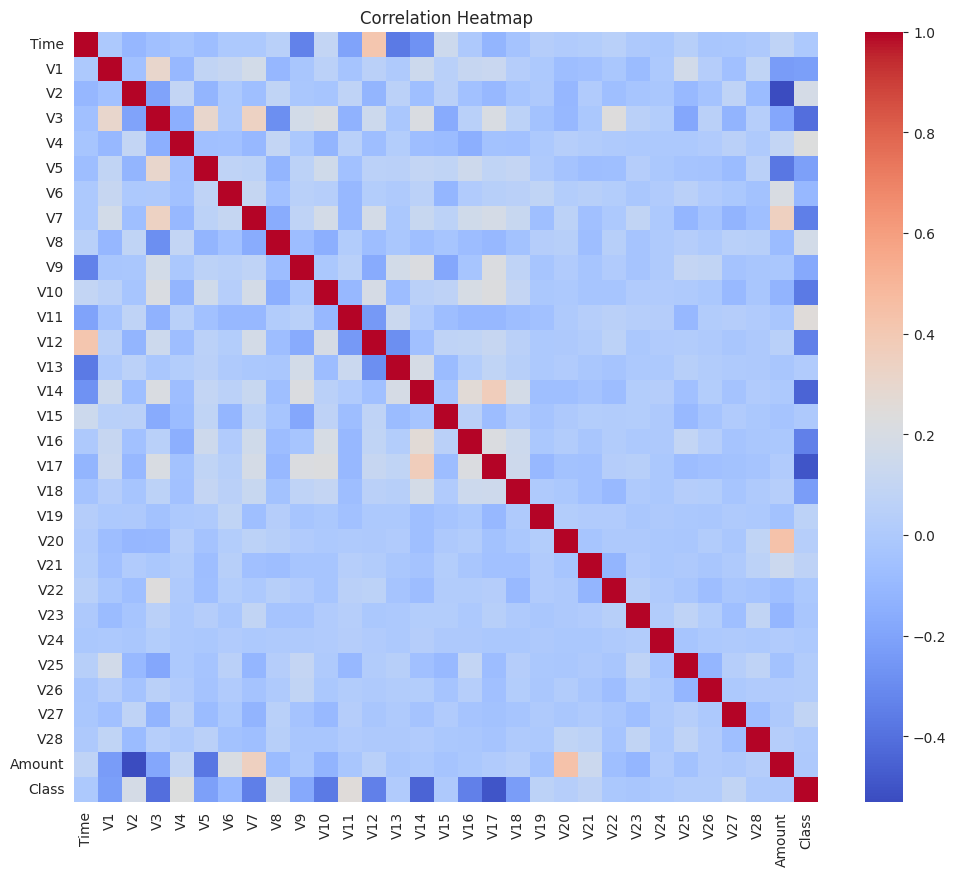

In [ ]:
# Step 6: Exploratory Data Analysis (EDA)


# Set plot style
sns.set_style('whitegrid')

# Class distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title("Fraud vs Non-Fraud Transactions")
plt.xlabel("Class (0 = Normal, 1 = Fraud)")
plt.ylabel("Count")
plt.show()

# Print percentages
fraud = df['Class'].value_counts()[1]
normal = df['Class'].value_counts()[0]
print("Fraudulent Transactions: {:.4f}%".format((fraud / len(df))*100))
print("Normal Transactions: {:.4f}%".format((normal / len(df))*100))

# Transaction Amount Distribution
plt.figure(figsize=(6,4))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title("Transaction Amounts: Fraud vs Non-Fraud")
plt.show()

# Optional: Histogram
plt.figure(figsize=(8,4))
sns.histplot(df[df['Class']==0]['Amount'], bins=50, label='Normal', kde=True)
sns.histplot(df[df['Class']==1]['Amount'], bins=50, label='Fraud', color='red', kde=True)
plt.title("Transaction Amount Distribution")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Transaction Time Analysis
plt.figure(figsize=(8,4))
sns.histplot(df[df['Class']==0]['Time'], bins=50, label='Normal', kde=True)
sns.histplot(df[df['Class']==1]['Time'], bins=50, label='Fraud', color='red', kde=True)
plt.title("Transaction Time Distribution")
plt.xlabel("Time (seconds)")
plt.ylabel("Count")
plt.legend()
plt.show()

# Correlation heatmap
plt.figure(figsize=(12,10))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# 7 Data Preprocessing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#  Check for missing values in the target
print("Missing values in Class column:", df['Class'].isnull().sum())

#  Remove rows where Class is NaN
df = df.dropna(subset=['Class'])
print("After removing NaNs, Class missing values:", df['Class'].isnull().sum())

#  Separate features and target
X = df.drop('Class', axis=1)
y = df['Class']

#  Scale numerical features: Amount and Time
scaler = StandardScaler()
X[['Amount', 'Time']] = scaler.fit_transform(X[['Amount', 'Time']])

#  Train-test split (80% train, 20% test, stratify to maintain class distribution)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#  Check shapes and class distribution
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train distribution:\n", y_train.value_counts())
print("y_test distribution:\n", y_test.value_counts())

Missing values in Class column: 1
After removing NaNs, Class missing values: 0
X_train shape: (38101, 30)
X_test shape: (9526, 30)
y_train distribution:
 Class
0.0    37984
1.0      117
Name: count, dtype: int64
y_test distribution:
 Class
0.0    9497
1.0      29
Name: count, dtype: int64


In [ ]:
# ===================================
# LOGISTIC REGRESSION (FINAL FIXED)
# ===================================

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load dataset (after manual upload)
df = pd.read_csv("/content/creditcard.csv")

# Split features/target
X = df.drop("Class", axis=1)
y = df["Class"]

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Logistic Regression
log_reg = LogisticRegression(max_iter=2000)
log_reg.fit(X_train, y_train)

# Prediction
y_pred = log_reg.predict(X_test)

# Evaluation
print("====== Logistic Regression ======")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


====== Logistic Regression ======
Accuracy: 0.9991573329588147

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.64      0.72        98

    accuracy                           1.00     56962
   macro avg       0.91      0.82      0.86     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
 [[56851    13]
 [   35    63]]


In [ ]:
# ==============================
# RANDOM FOREST MODEL
# ==============================

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load dataset
df = pd.read_csv("/content/creditcard.csv")

# Split features/target
X = df.drop("Class", axis=1)
y = df["Class"]

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Random Forest
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight="balanced"
)
rf.fit(X_train, y_train)

# Prediction
y_pred = rf.predict(X_test)

# Evaluation
print("====== Random Forest ======")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


====== Random Forest ======
Accuracy: 0.9995259997893332

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.76      0.85        98

    accuracy                           1.00     56962
   macro avg       0.98      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
 [[56861     3]
 [   24    74]]


In [ ]:
# ==============================
# K-MEANS CLUSTERING
# ==============================

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load dataset
df = pd.read_csv("/content/creditcard.csv")

# Remove target label (unsupervised)
X = df.drop("Class", axis=1)

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to dataframe
df["Cluster"] = clusters

print("====== K-Means Clustering ======")
print(df[["Class", "Cluster"]].head(20))

print("\nCluster Distribution:")
print(df["Cluster"].value_counts())

# Compare clusters with true fraud labels
print("\nCross-tabulation:")
print(pd.crosstab(df["Class"], df["Cluster"]))


====== K-Means Clustering ======
    Class  Cluster
0       0        0
1       0        0
2       0        0
3       0        0
4       0        0
5       0        0
6       0        0
7       0        0
8       0        0
9       0        0
10      0        0
11      0        0
12      0        0
13      0        0
14      0        0
15      0        0
16      0        0
17      0        0
18      0        0
19      0        0

Cluster Distribution:
Cluster
0    155337
1    129470
Name: count, dtype: int64

Cross-tabulation:
Cluster       0       1
Class                  
0        155038  129277
1           299     193
